In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv(r'C:\Users\User\Desktop\tugas akhir files\student_grade.csv', delimiter=',')

In [2]:
# Corelate all features with the target 'grades'
df_corr= df.drop(['grades','AvgGrade','G3','G2','G1'], axis='columns')
corr_matrix = df_corr.corr(method='spearman')
corr_matrix['PorF'].sort_values(ascending=False)

PorF          1.000000
higher        0.234790
Medu          0.223630
Fedu          0.170683
studytime     0.166484
address       0.141961
internet      0.118904
nursery       0.060254
activities    0.058414
sex           0.055692
famrel        0.054576
famsize       0.029911
Pstatus      -0.006234
famsup       -0.008536
guardian     -0.025276
Fjob         -0.041380
romantic     -0.041958
freetime     -0.045414
paid         -0.053509
health       -0.083292
goout        -0.087095
reason       -0.094905
age          -0.098905
schoolsup    -0.103836
Mjob         -0.105415
absences     -0.138072
traveltime   -0.138641
Walc         -0.146465
Dalc         -0.170423
failures     -0.317270
Name: PorF, dtype: float64

In [3]:
X = df[['Medu','Fedu','Mjob','higher','studytime','address',
       'failures','Dalc','absences','traveltime']]
X_corr = df[['Medu','Fedu','Mjob','higher','studytime','address',
       'failures','Dalc','absences','traveltime','PorF']]
Y = df['PorF'] # Target Grades

In [4]:
print('X column Values:')
X.columns.values

X column Values:


array(['Medu', 'Fedu', 'Mjob', 'higher', 'studytime', 'address',
       'failures', 'Dalc', 'absences', 'traveltime'], dtype=object)

correlation with x:


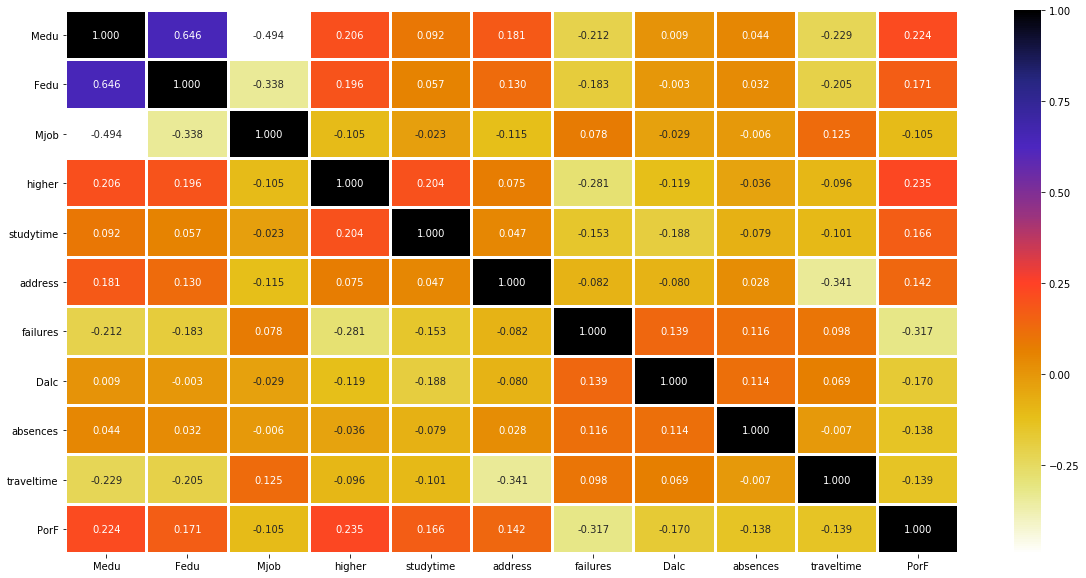

In [5]:
print('correlation with x:')
# Data correlation
plt.figure(figsize=(20,10))
sns.heatmap(X_corr.corr(method='spearman'),annot=True,cmap='CMRmap_r',fmt='.3f',linewidths=2)
plt.show()

In [5]:
X.head()

,Medu,Fedu,Mjob,higher,studytime,address,failures,Dalc,absences,traveltime
0,4,4,3,1,2,1,0,1,6,2
1,1,1,3,1,2,1,0,1,4,1
2,1,1,3,1,2,1,3,2,10,1
3,4,2,1,1,3,1,0,1,2,1
4,3,3,4,1,2,1,0,1,4,1


In [6]:
# ONE HOT ENCODER
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

coltrans = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [0,1,2])],
    remainder='passthrough'
)
X = np.array(coltrans.fit_transform(X), dtype=np.float64)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=100)

# Decision Trees
from sklearn import tree
modelDT = tree.DecisionTreeClassifier(max_leaf_nodes=15, random_state=0)
modelDT.fit(x_train, y_train)
print('DT Score: ',round(modelDT.score(x_test, y_test)*100,2),'%')
pred_DT = modelDT.predict(x_test)
print('predicted DT: ', pred_DT[0])
print('Actual target value: ', y_test.iloc[0])

# Support vector Machine
from sklearn.svm import SVC
modelSVM = SVC(gamma='auto',decision_function_shape='ovo')
modelSVM.fit(x_train, y_train)
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
print('SVM Score: ',round(modelSVM.score(x_test, y_test)*100,2),'%')
pred_SVM = modelSVM.predict(x_test)
print('predicted SVM: ', pred_SVM[0])
print('Actual target value: ', y_test.iloc[0])

# K-nearest Neighbours
def nNeighbors():
    x = round(len(df) ** 0.5)
    if x % 2 == 0:
        return x + 1
    else:
        return x
    
from sklearn.neighbors import KNeighborsClassifier
modelKn = KNeighborsClassifier(n_neighbors=nNeighbors())
modelKn.fit(x_train,y_train)
print('Kn Score: ',round(modelKn.score(x_test, y_test)*100,2),'%')
pred_Kn = modelKn.predict(x_test)
print('predicted Kn: ', pred_Kn[0])
print('Actual target value: ', y_test.iloc[0])

# Logistic regression (modellog)
from sklearn.linear_model import LogisticRegression
modellog = LogisticRegression(solver='liblinear')
modellog.fit(x_train, y_train)
print('Log Score: ',round(modellog.score(x_test, y_test)*100,2),'%')
pred_log = modellog.predict(x_test)
print('predicted Log: ', pred_log[0])
print('Actual target value: ', y_test.iloc[0])



DT Score:  68.57 %
predicted DT:  1
Actual target value:  1
SVM Score:  72.38 %
predicted SVM:  1
Actual target value:  1
Kn Score:  69.52 %
predicted Kn:  1
Actual target value:  1
Log Score:  69.52 %
predicted Log:  1
Actual target value:  1



SVM is choosen for ML 

In [8]:
# [0.,0.,0.,0.,1.,0.,0.,0.,0.,1.,   0.,    0.,     0.,      1.,   0.,    1.,      2.,     1.,      0.,   1.,    6.,       2.]
# M0,M1,M2,M3,M4,F0,F1,F2,F3,F4,TEACHER,HEALTH,SERVICES,AT_HOME,OTHER,HIGHER,STUDYTIME,ADDRESS,FAILURES,DALC,ABSENCE,TRAVELTIME
